### 导入模拟数据

使用模拟数据，测试模型

In [1]:
import os
import numpy as np
import tensorflow as tf

os.chdir("/home/num_24/桌面/mywork/github/TFDeepSurv")
os.getcwd()

np.random.seed(10)

from dataset import SimulatedData
import LDeepSurv as LDS

data_config = SimulatedData(100, num_var = 4, num_features = 10)
data = data_config.generate_data(2000)
sort_idx = np.argsort(data['t'])[::-1]
data['x'] = data['x'] [sort_idx]
data['e'] = data['e'] [sort_idx]
data['t'] = data['t'] [sort_idx]

features:  10
-------------------------------------------------
training steps 1:
loss = 12724.8.

CI = 0.494159.

-------------------------------------------------
training steps 501:
loss = 12719.

CI = 0.522923.

-------------------------------------------------
training steps 1001:
loss = 12693.

CI = 0.554192.

-------------------------------------------------
training steps 1501:
loss = 12640.5.

CI = 0.583719.

-------------------------------------------------
training steps 2001:
loss = 12561.1.

CI = 0.606833.

-------------------------------------------------
training steps 2501:
loss = 12531.5.

CI = 0.624041.



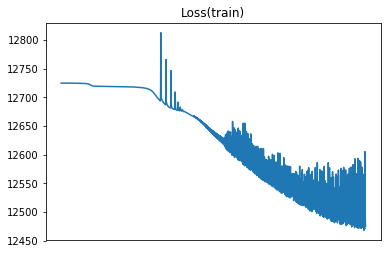

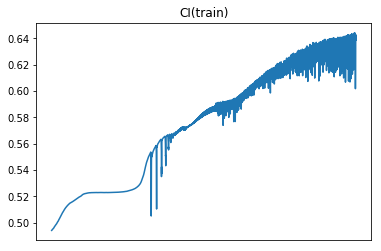

In [2]:
n_features = data['x'].shape[1]
print("features: ", n_features)
model = LDS.LDeepSurv(n_features, [8, 5, 3], 1, 
                      learning_rate=0.001,
                      activation='tanh', 
                      L1_reg=0.01, 
                      optimizer='sgd')

model.train(data['x'], {'e': data['e'], 't': data['t']}, 
            num_epoch=3000, iteration=500,
            plot_train_loss=True, plot_train_CI=True)

In [3]:
model.eval(data['x'], {'e': data['e'], 't': data['t']})

CI on test set = 0.641599.


0.64159949780288761

In [4]:
model.evaluate_var_byWeights()

feature 0 score : -0.360932.
feature 1 score : -0.106192.
feature 2 score : 1.
feature 3 score : -0.167117.
feature 4 score : -0.192233.
feature 5 score : 0.327471.
feature 6 score : -0.128327.
feature 7 score : -0.148866.
feature 8 score : 0.250334.
feature 9 score : 0.0119011.


array([-0.36093205, -0.10619228,  1.        , -0.16711748, -0.19223323,
        0.32747114, -0.12832665, -0.14886606,  0.25033441,  0.01190112], dtype=float32)

In [4]:
print(model.sess)

In [5]:
model.sess.close()

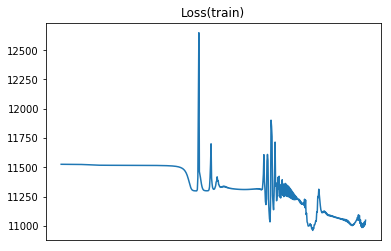

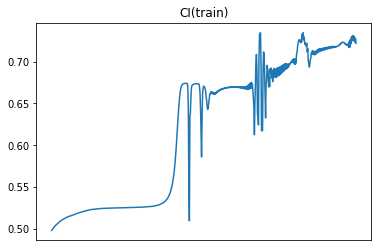

In [6]:
model0 = LDS.LDeepSurv(n_features, [6,3], 1, learning_rate=0.001, activation='tanh', L2_reg=0.01, optimizer='adam')

model0.train(data['x'], {'e': data['e'], 't': data['t']}, num_epoch=600, plot_train_loss=True, plot_train_CI=True)

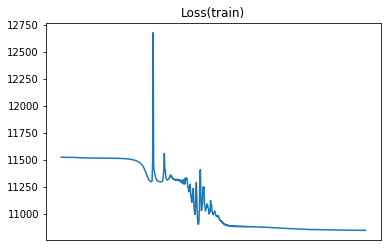

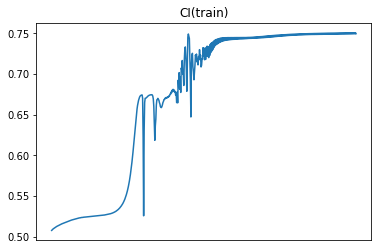

In [4]:
model2 = LDS.LDeepSurv(n_features, [6,3], 1, learning_rate=0.001, activation='tanh', L2_reg=0.01, optimizer='adam')

model2.train(data['x'], {'e': data['e'], 't': data['t']}, num_epoch=600, plot_train_loss=True, plot_train_CI=True)

features:  10


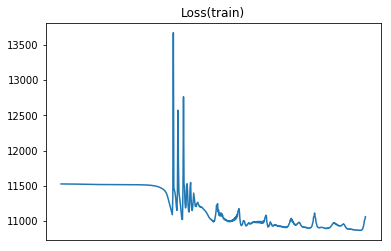

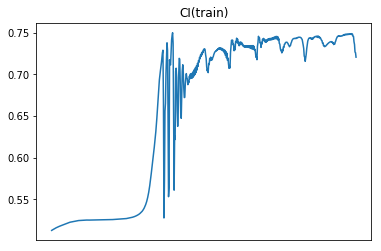

In [3]:
n_features = data['x'].shape[1]
print("features: ", n_features)
model = LDS.LDeepSurv(n_features, [6,3], 1, learning_rate=0.001, activation='tanh', L2_reg=0.01)

model.train(data['x'], {'e': data['e'], 't': data['t']}, num_epoch=600, plot_train_loss=True, plot_train_CI=True)

In [3]:
import tensorflow as tf

print(tf.global_variables())

[<tf.Variable 'layer1/weights:0' shape=(10, 6) dtype=float32_ref>, <tf.Variable 'layer1/biases:0' shape=(6,) dtype=float32_ref>, <tf.Variable 'layer2/weights:0' shape=(6, 3) dtype=float32_ref>, <tf.Variable 'layer2/biases:0' shape=(3,) dtype=float32_ref>, <tf.Variable 'layer_last/weights:0' shape=(3, 1) dtype=float32_ref>, <tf.Variable 'layer_last/biases:0' shape=(1,) dtype=float32_ref>, <tf.Variable 'training_step/global_step:0' shape=() dtype=int32_ref>]


In [4]:
with tf.Session() as sess:
    c = tf.get_collection('losses')
    x = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    y = tf.get_collection(tf.GraphKeys.WEIGHTS)
    print(c, x, y)

[] [<tf.Tensor 'layer1/weights/Regularizer/l1_l2_regularizer:0' shape=() dtype=float32>, <tf.Tensor 'layer2/weights/Regularizer/l1_l2_regularizer:0' shape=() dtype=float32>, <tf.Tensor 'layer_last/weights/Regularizer/l1_l2_regularizer:0' shape=() dtype=float32>, <tf.Tensor 'get_regularization_penalty:0' shape=() dtype=float32>] []


In [5]:
print(tf.trainable_variables())

[<tf.Variable 'layer1/weights:0' shape=(10, 6) dtype=float32_ref>, <tf.Variable 'layer1/biases:0' shape=(6,) dtype=float32_ref>, <tf.Variable 'layer2/weights:0' shape=(6, 3) dtype=float32_ref>, <tf.Variable 'layer2/biases:0' shape=(3,) dtype=float32_ref>, <tf.Variable 'layer_last/weights:0' shape=(3, 1) dtype=float32_ref>, <tf.Variable 'layer_last/biases:0' shape=(1,) dtype=float32_ref>]
